In [1]:
import networkx as nx
from nxpd import draw

In [2]:
class GithubLicenseGraph():
    def __init__(self,graph):
        self.graph = graph
        self.license_type_tuple = ('P','WP','SP','NP')
        
    def get_vertex(self,name):
        for vertex in self.graph.nodes():
            if name in self.graph.node[vertex]["names"]:
                return vertex
        return None
        
    
    def get_reachable_vertices(self,node):
        reachable_node_list = nx.descendants(self.graph,node)
        return [node]+list(reachable_node_list)
    
    def get_common_destination_license_vertex(self,list_of_licenses):
        list_of_licenses = [self.get_vertex(x) for x in list_of_licenses]
        reachable_vertex_list = None
        for vertex in list_of_licenses:
            reachable_vertices = self.get_reachable_vertices(vertex)
            reachable_licenses = reachable_vertices
            if reachable_vertex_list is None:
                reachable_vertex_list = reachable_licenses
            else:
                reachable_vertex_list = [license_vertex for license_vertex in reachable_vertex_list if license_vertex in reachable_licenses ]
        common_destination = None
        if len(reachable_vertex_list)>0:
            for license_vertex in reachable_vertex_list:
                if license_vertex in list_of_licenses:
                    common_destination = license_vertex
            if common_destination is None:
                for license_type in self.license_type_tuple:
                    for x in reachable_vertex_list: 
                        if self.graph.node[x]['permission'] == license_type:
                            common_destination = x 
                        if common_destination is not None:
                            break
                    if common_destination is not None:
                            break
        return common_destination
    
    @classmethod
    def train(cls):
        G = nx.DiGraph()
        G.add_node('pd',{'names':['PD'],'permission':'P'})
        G.add_node('mit',{'names':['MIT'],'permission':'P'})
        G.add_node('bsd',{'names':['BSD'],'permission':'P'})
        G.add_node('apache',{'names':['APACHE'],'permission':'P'})
        G.add_node('lgpl2',{'names':['LGPL V2.1'],'permission':'WP'})
        G.add_node('lgpl22',{'names':['LGPL V2.1+'],'permission':'WP'})
        G.add_node('lgpl3',{'names':['LGPL V3+'],'permission':'WP'})
        G.add_node('mpl',{'names':['MPL 1.1'],'permission':'WP'})
        G.add_node('gpl2',{'names':['GPL V2'],'permission':'SP'})
        G.add_node('gpl22',{'names':['GPL V2+'],'permission':'SP'})
        G.add_node('gpl3',{'names':['GPL V3+'],'permission':'SP'})
        G.add_node('agpl3',{'names':['AGPL V3+'],'permission':'NP'})

        G.add_edges_from([('pd','mit'),('mit','bsd'),('bsd','apache'),('bsd','mpl'),('bsd','lgpl2'),('bsd','lgpl22'),('bsd','lgpl3'),('apache','lgpl3'),
                          ('lgpl22','lgpl2'),('lgpl22','lgpl3'),('lgpl2','gpl2'),('lgpl2','gpl22'),('lgpl22','gpl22'),('lgpl3', 'gpl3'),('gpl22','gpl2'),
                         ('gpl22','gpl3'),('gpl3','agpl3')])
        return GithubLicenseGraph(G)


    @classmethod
    def load(cls, filename):
        """
        Loads already saved Graph
        """
        G = nx.read_gpickle(filename)
        return GithubLicenseGraph(G)

    def save(self, filename):
        """
        Saves the Gnosis in data_store
        """
        nx.write_gpickle(self.graph,filename)
        return None
    
    def show(self):
        return draw(self.graph,show='ipynb')

In [3]:
g = GithubLicenseGraph.train()
print type(g)

<type 'instance'>


In [4]:
g.save(filename="../data/github_license_graph.pkl")

In [5]:
g = GithubLicenseGraph.load(filename="../data/github_license_graph.pkl")

In [6]:
m = g.get_common_destination_license_vertex(['LGPL V2.1','APACHE'])
print m

gpl3


In [7]:
m = g.get_common_destination_license_vertex(['PD','APACHE'])
print m

apache


In [8]:
m = g.get_common_destination_license_vertex(['BSD','LGPL V2.1+'])
print m

lgpl22


In [9]:
m = g.get_common_destination_license_vertex(['BSD','LGPL V2.1+','GPL V3+'])
print m

gpl3


In [10]:
m = g.get_common_destination_license_vertex(['MIT','GPL V2+','APACHE'])
print m

gpl3


In [11]:
m = g.get_common_destination_license_vertex(['GPL V2','APACHE'])
print m

None


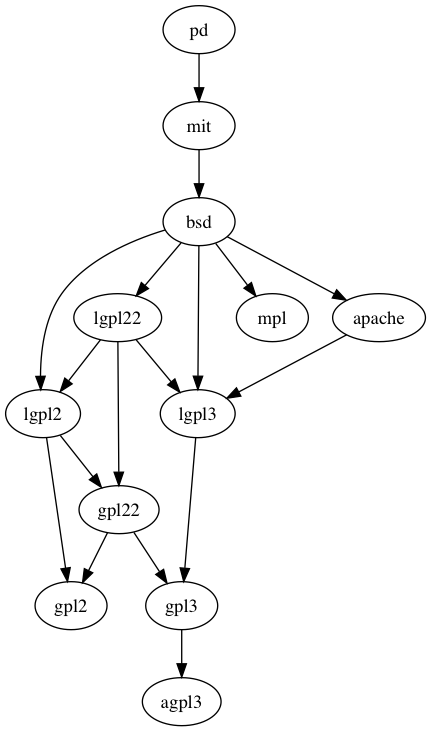

In [12]:
g.show()